In [8]:
%load_ext autoreload
# import datetime
# import ete3
import itertools
# import json
import logging
# import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import typing
# import re
# import xml.etree.ElementTree as ET
# import xml.dom.minidom
# import xmlschema

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
%autoreload
from maxes.xes_loader2 import XesLoader, XesLog
# from maxes.xes_file import XesFile
# from maxes.analyze_xes import AnalyzeXes
# import maxes.analyze_sequence
# import maxes.serialization.serialize
# import maxes.graphs
import maxes.notebooks.load_files
import maxes.notebooks.utils
import maxes.utils
import maxes.analyze_sequence
import maxes.graphs
from maxes.generators.xes_generator.xes_generator1 import XesGenerator1

In [3]:
maxes.notebooks.utils.init_notebook() # RUN ONLY ONCE

Loading config from: C:\vt\md\maxes\maxes\config.local.yml
Config:
{'project_directory_path': '/vt/md/maxes/maxes', 'data_directory_path': '/vt/md/maxes/maxes/data'}








Planas:

- parodyti output'ą is ChatGPT
- parodyti XES failus (3) ir jų interpretaciją
- parodyti relevant straipsnį








1. Sample XES from ChatGPT

In [27]:
log_chatgpt_sample_path = os.path.join(maxes.notebooks.utils.get_project_path(), "data/other/chatgpt-sample.xes")
log_chatgpt_sample = maxes.notebooks.utils.load_xes(log_chatgpt_sample_path)

log_chatgpt_sample.df

,concept:name,lifecycle:transition,org:resource,time:timestamp
0,Start Process,start,User A,2023-10-09 10:00:00+00:00
1,Start Process,complete,User A,2023-10-09 10:05:00+00:00
2,Check Document,start,User B,2023-10-09 10:30:00+00:00
3,Check Document,complete,User B,2023-10-09 10:40:00+00:00
4,Approve Document,start,User C,2023-10-09 11:00:00+00:00
5,Approve Document,complete,User C,2023-10-09 11:10:00+00:00
6,End Process,start,User A,2023-10-09 11:30:00+00:00
7,End Process,complete,User A,2023-10-09 11:35:00+00:00
0,Start Process,start,User D,2023-10-09 12:00:00+00:00
1,Start Process,complete,User D,2023-10-09 12:05:00+00:00


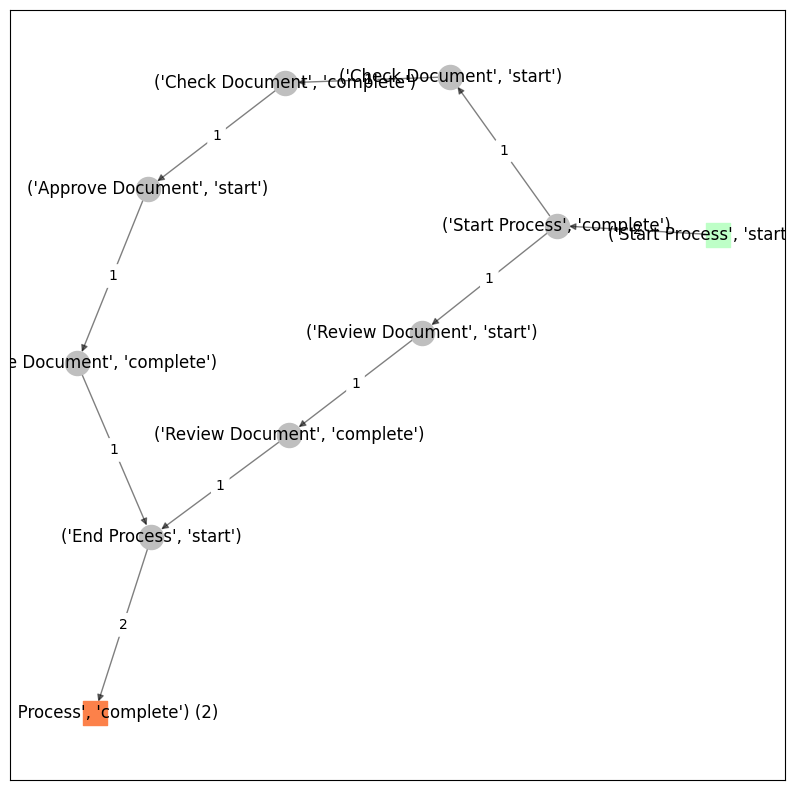

In [28]:
graph = maxes.analyze_sequence.analyze_xes_log_sequence(log_chatgpt_sample)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# fig.dpi = 20
# maxes.analyze_sequence.draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=nx.circular_layout(graph))
maxes.analyze_sequence.draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=nx.kamada_kawai_layout(graph))

In [43]:
generated_log_chatgpt_sample = XesGenerator1().fit(log_chatgpt_sample).generate()
generated_log_chatgpt_sample._update_df()

maxes.notebooks.utils.write_xes_to_file(
    generated_log_chatgpt_sample,
    skeleton_log=log_chatgpt_sample,
    destination_file_path=os.path.join(maxes.notebooks.utils.get_project_path(), "output/data_generated/generated_log_chatgpt_sample.xes")
)

generated_log_chatgpt_sample.df

,concept:name,lifecycle:transition,time:timestamp,org:resource
0,Start Process,start,2023-10-09 11:59:59.184983+00:00,User D
1,Start Process,complete,2023-10-09 12:04:59.490617+00:00,User C
2,Check Document,start,2023-10-09 12:29:58.797440+00:00,User A
3,Check Document,complete,2023-10-09 12:39:59.587284+00:00,User A
4,Approve Document,start,2023-10-09 13:00:00.793848+00:00,User A
5,Approve Document,complete,2023-10-09 13:10:00.688756+00:00,User C
6,End Process,start,2023-10-09 13:29:59.534687+00:00,User B
7,End Process,complete,2023-10-09 13:35:00.433374+00:00,User A
0,Start Process,start,2023-10-09 11:59:59.707795+00:00,User A
1,Start Process,complete,2023-10-09 12:04:59.150950+00:00,User D


2. Simple XES Example

In [32]:
log_simple_path = os.path.join(maxes.notebooks.utils.get_project_path(), "data/other/simple.xes")
log_simple = maxes.notebooks.utils.load_xes(log_simple_path)

log_simple.df

,call centre,org:resource,time:timestamp,lifecycle:transition,concept:name,location,duration,outcome
0,Brisbane,customer,1970-01-01 00:00:00+00:00,complete,incoming claim,NaN,NaN,NaN
1,NaN,Call Centre Agent Brisbane,1970-01-01 00:00:00+00:00,start,B check if sufficient information is available,Brisbane,NaN,NaN
2,NaN,Call Centre Agent Brisbane,1970-01-01 00:00:41+00:00,complete,B check if sufficient information is available,Brisbane,NaN,NaN
3,NaN,Call Centre Agent Brisbane,1970-01-01 00:00:41+00:00,start,B register claim,NaN,NaN,NaN
4,NaN,Call Centre Agent Brisbane,1970-01-01 00:12:59+00:00,complete,B register claim,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4,NaN,Call Centre Agent Sydney,1970-01-01 02:39:31+00:00,complete,S register claim,NaN,NaN,NaN
5,NaN,Claims handler,1970-01-01 06:56:04+00:00,start,determine likelihood of claim,NaN,NaN,NaN
6,NaN,Claims handler,1970-01-01 06:56:35+00:00,complete,determine likelihood of claim,NaN,NaN,NaN
7,NaN,Claims handler,1970-01-01 06:56:35+00:00,start,end,NaN,17306,not liable


In [33]:
graph = maxes.analyze_sequence.analyze_xes_log_sequence(log_simple)

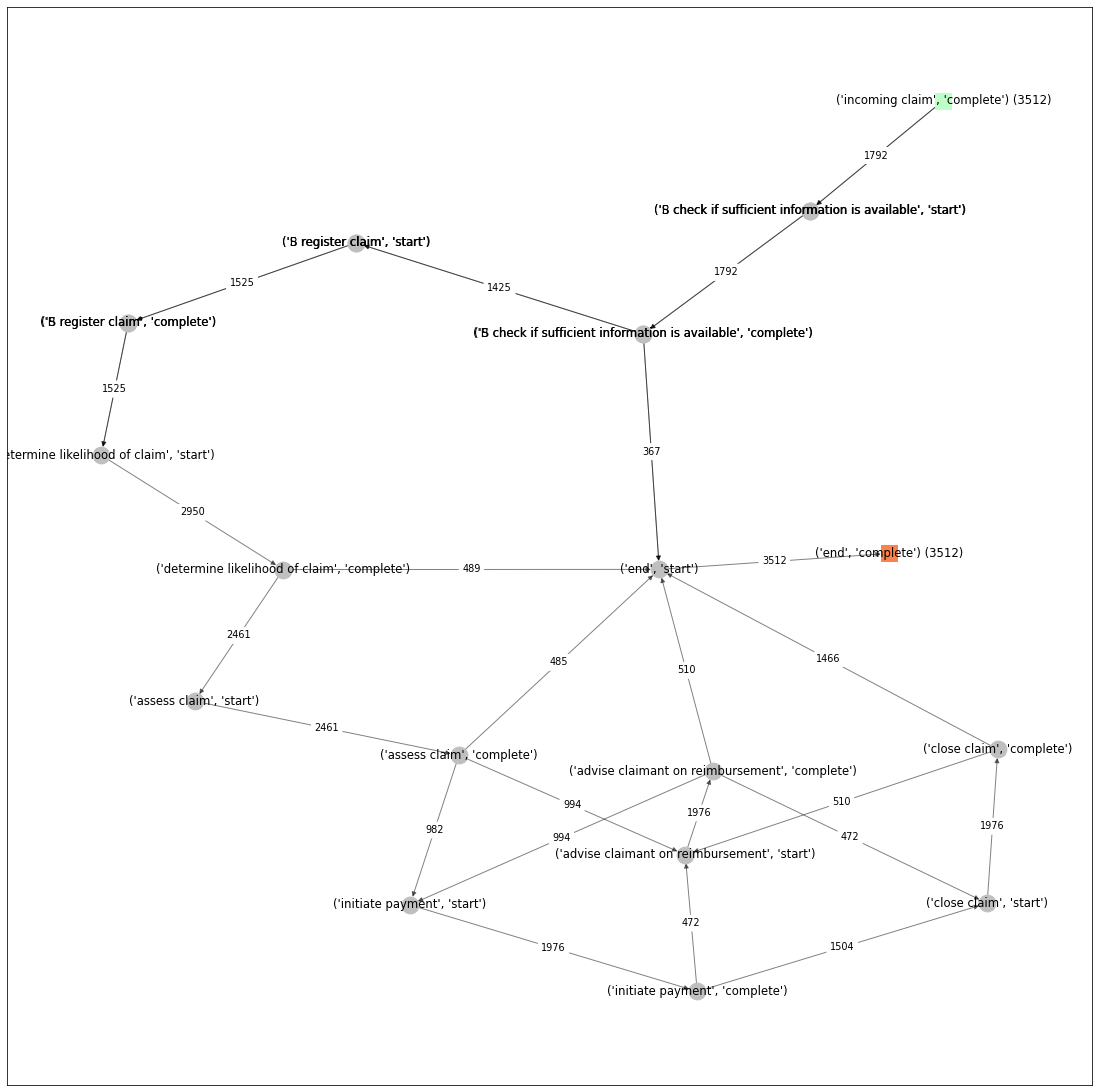

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
fig.dpi = 70
# maxes.analyze_sequence.draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=nx.circular_layout(graph))
maxes.analyze_sequence.draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=nx.kamada_kawai_layout(graph))

In [44]:
generated_log_simple = XesGenerator1().fit(log_simple).generate()
generated_log_simple._update_df()

maxes.notebooks.utils.write_xes_to_file(
    generated_log_simple,
    skeleton_log=log_simple,
    destination_file_path=os.path.join(maxes.notebooks.utils.get_project_path(), "output/data_generated/generated_log_simple.xes")
)

generated_log_simple.df

,concept:name,lifecycle:transition,time:timestamp,call centre,org:resource,location,duration,outcome
0,incoming claim,complete,1970-01-01 01:33:46.783298+00:00,Brisbane,customer,Sydney,123,rejected
1,S check if sufficient information is available,start,1970-01-01 01:34:14.328202+00:00,Sydney,Claims handler,Brisbane,16583,processed
2,S check if sufficient information is available,complete,1970-01-01 01:35:18.742023+00:00,Sydney,Claims handler,Brisbane,5651,rejected
3,end,start,1970-01-01 01:35:18.673631+00:00,Brisbane,Claims handler,Sydney,28224,not liable
4,end,complete,1970-01-01 01:35:18.330527+00:00,Brisbane,Call Centre Agent Sydney,Brisbane,34860,not liable
...,...,...,...,...,...,...,...,...
10,initiate payment,complete,1970-01-01 01:08:18.004515+00:00,Brisbane,Call Centre Agent Brisbane,Brisbane,7529,processed
11,close claim,start,1970-01-01 01:08:17.061819+00:00,Sydney,Claims handler,Sydney,30411,processed
12,close claim,complete,1970-01-01 01:08:19.199947+00:00,Brisbane,Claims handler,Sydney,416,processed
13,end,start,1970-01-01 01:08:17.823662+00:00,Sydney,Claims handler,Brisbane,223,rejected


3. Advances XES Example

In [35]:
log_activities_detailed_labour = maxes.notebooks.load_files.load_activities_detailed_labour()
log_activities_detailed_labour.df

,concept:name,lifecycle:transition,time:timestamp,Column_4
0,Start,start,2012-11-11 23:48:38+00:00,Start
1,Start,complete,2012-11-11 23:48:38+00:00,Start
2,washing,start,2012-11-11 23:48:38+00:00,washing
3,washing,complete,2012-11-11 23:50:12+00:00,washing
4,watchingtv,start,2012-11-11 23:50:29+00:00,watchingtv
...,...,...,...,...
37,washing,complete,2011-12-09 20:04:50+00:00,washing
38,watchingtv,start,2011-12-09 20:04:59+00:00,watchingtv
39,watchingtv,complete,2011-12-09 23:16:21+00:00,watchingtv
40,End,start,2011-12-09 23:16:21+00:00,End


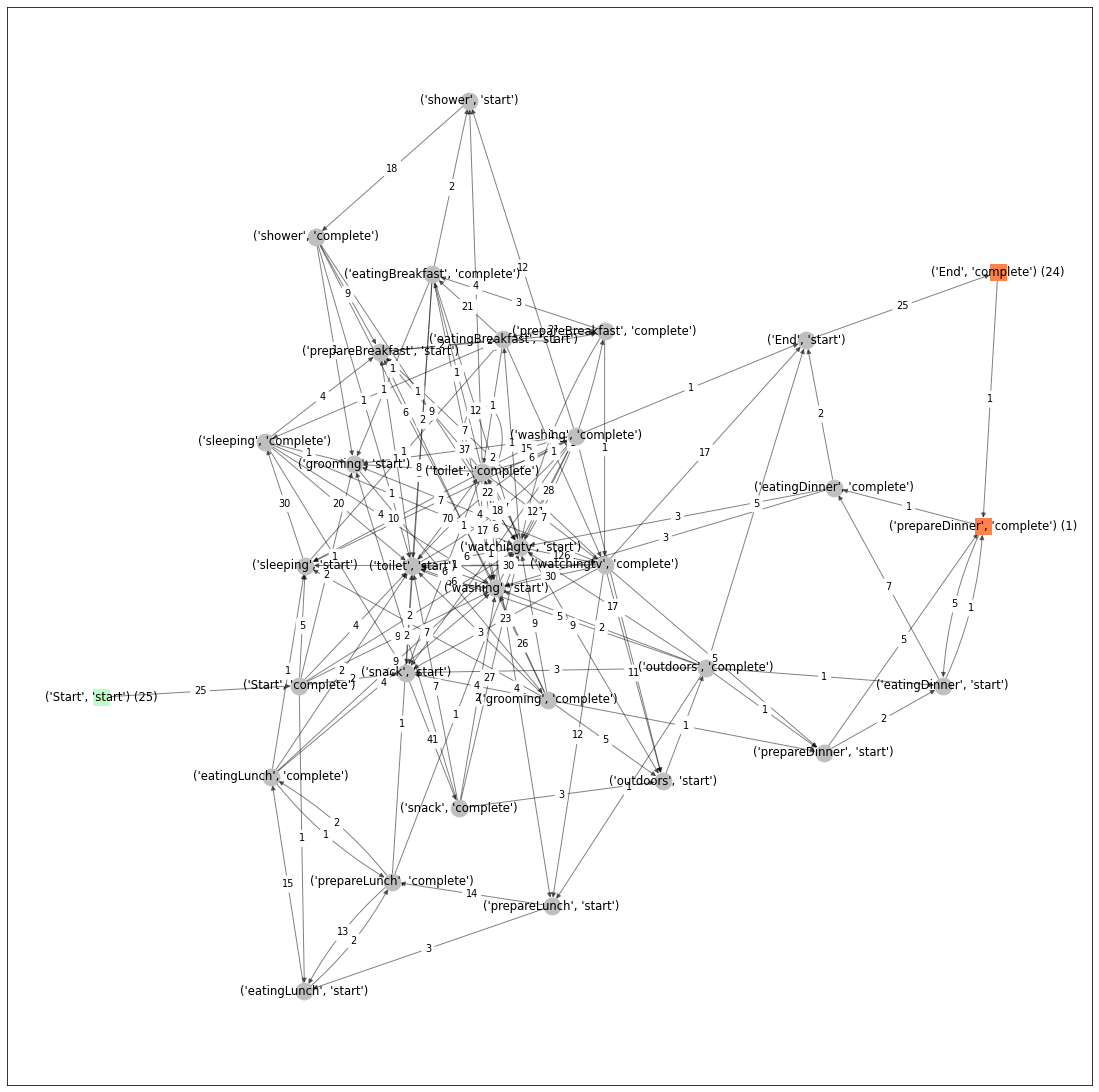

In [36]:
graph = maxes.analyze_sequence.analyze_xes_log_sequence(log_activities_detailed_labour)

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
fig.dpi = 70
# maxes.analyze_sequence.draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=nx.circular_layout(graph))
maxes.analyze_sequence.draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=nx.kamada_kawai_layout(graph))